In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer,TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
stemmer=PorterStemmer()
import re
from gensim.models import word2vec
ex='[^a-zA-Z]'
lemitizer=WordNetLemmatizer()

In [3]:
df=pd.read_csv('train.csv')

In [4]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


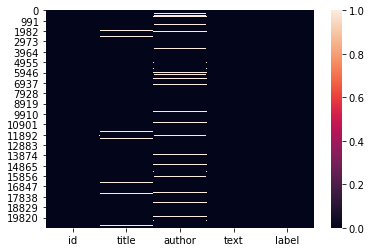

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.notnull().sum()

id        20800
title     20242
author    18843
text      20761
label     20800
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df=df.reset_index()

In [9]:
msg=df.copy()

In [15]:
data=[]
for i in range(len(msg)):
    rev=re.sub(ex,' ',msg['title'][i])
    rev=rev.lower()
    rev=rev.split()
    rev=[lemitizer.lemmatize(words) for words in rev if words not in stopwords.words('english')]
    rev=' '.join(rev)
    data.append(rev)

In [16]:
data

['house dem aide even see comey letter jason chaffetz tweeted',
 'flynn hillary clinton big woman campus breitbart',
 'truth might get fired',
 'civilian killed single u airstrike identified',
 'iranian woman jailed fictional unpublished story woman stoned death adultery',
 'jackie mason hollywood would love trump bombed north korea lack trans bathroom exclusive video breitbart',
 'beno hamon win french socialist party presidential nomination new york time',
 'back channel plan ukraine russia courtesy trump associate new york time',
 'obama organizing action partner soros linked indivisible disrupt trump agenda',
 'bbc comedy sketch real housewife isi cause outrage',
 'russian researcher discover secret nazi military base treasure hunter arctic photo',
 'u official see link trump russia',
 'yes paid government troll social medium blog forum website',
 'major league soccer argentine find home success new york time',
 'well fargo chief abruptly step new york time',
 'anonymous donor pay 

In [18]:
vectorizer=TfidfVectorizer()

In [19]:
X=vectorizer.fit_transform(data)

In [21]:
X=X.toarray()

In [22]:
X.shape

(18285, 17467)

In [24]:
df.shape

(18285, 6)

In [25]:
y=df['label']

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

<IPython.core.display.Javascript object>

In [36]:
logr=LogisticRegression(max_iter=100000)
logr.fit(X_train,y_train)
logr.score(X_train,y_train),logr.score(X_test,y_test)

(0.9439018673333854, 0.917973022238425)

In [31]:
logr=DecisionTreeClassifier()
logr.fit(X_train,y_train)
logr.score(X_train,y_train),logr.score(X_test,y_test)

(1.0, 0.9126868392271236)

In [32]:
logr=RandomForestClassifier()
logr.fit(X_train,y_train)
logr.score(X_train,y_train),logr.score(X_test,y_test)

(1.0, 0.9316441851986875)

In [33]:
logr=MultinomialNB()
logr.fit(X_train,y_train)
logr.score(X_train,y_train),logr.score(X_test,y_test)

(0.9153840143761232, 0.8477943857090776)

In [38]:
logr=PassiveAggressiveClassifier()
logr.fit(X_train,y_train)
logr.score(X_train,y_train),logr.score(X_test,y_test)

(1.0, 0.9236237695953335)